# II. Baseline Model

[//]: # (TODO: Write methodology and observations here)

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from utils import dataset
from utils.visualization import plot_learning_curve
from utils.visualization import visualize_predictions


plt.style.use('ggplot')

## II.1. Load Dataset

In [2]:
df = dataset.load()
train, test = train_test_split(df, shuffle=True, test_size=0.2, random_state=42)
train, val = train_test_split(train, shuffle=True, test_size=0.25, random_state=42)

print(f'Train data: {train.shape[0]} samples, Validation Data: {val.shape[0]} samples, Test Data: {test.shape[0]} samples.')

Train data: 2772 samples, Validation Data: 924 samples, Test Data: 925 samples.


## II.2. Baseline Model Setup and Training

### II.2.1. Baseline Parameters

In [3]:
# Model Parameters
IMG_SIZE = 256
BATCH_SIZE = 32
INPUT_DIM = (IMG_SIZE, IMG_SIZE, 3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 8

# Training Parameters
EPOCHS = 16

### II.2.2. Model Setup

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 256)               50331904  
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 8)                 2056      
                                                                 
Total params: 50,465,544
Trainable params: 50,465,544
Non-trainable params: 0
_________________________________________________________________


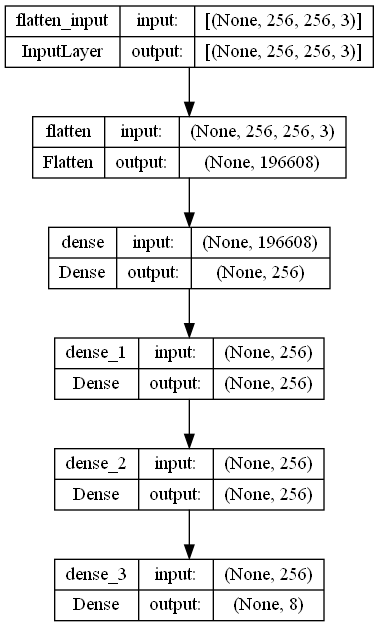

In [5]:
tf.keras.utils.plot_model(model, show_shapes=True, to_file='images/baseline-model-diagram.png')

### II.2.3. Training

In [6]:
train['Class'] = train['Class'].astype('str')
train_datagen = ImageDataGenerator(data_format='channels_last')
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory='../data/',
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val['Class'] = val['Class'].astype('str')
val_datagen = ImageDataGenerator(data_format='channels_last')
val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory='../data/',
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 2772 validated image filenames belonging to 8 classes.
Found 924 validated image filenames belonging to 8 classes.


In [7]:
model.compile(
    optimizer='SGD',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['categorical_accuracy']
)

history = model.fit(train_generator, validation_data=val_generator, epochs=EPOCHS, verbose=0)

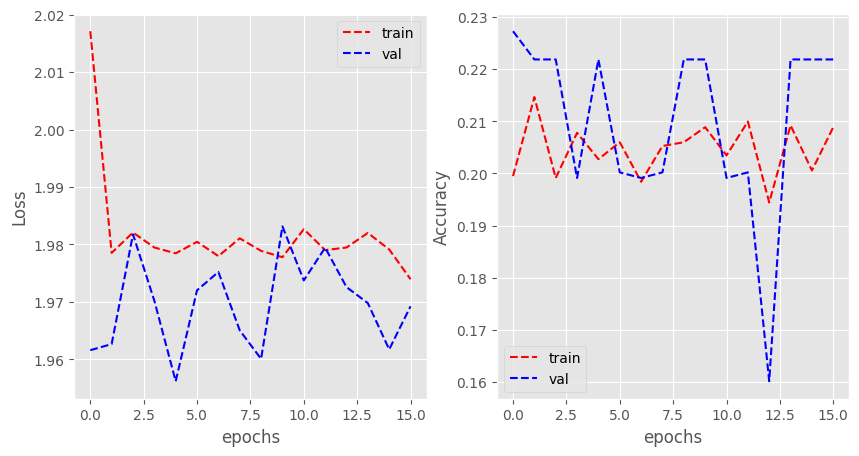

In [8]:
plot_learning_curve(
    history.history['loss'],
    history.history['val_loss'],
    history.history['categorical_accuracy'],
    history.history['val_categorical_accuracy'],
    to_file='images/learning-curve-baseline-model.png'
)

## II.3. Baseline Model Performance

In [9]:
test['Class'] = test['Class'].astype('str')
test_datagen = ImageDataGenerator(data_format='channels_last')
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory='../data/',
    x_col='ImgPath',
    y_col='Class',
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=1,
    class_mode='categorical'
)

model.evaluate(test_generator)

Found 925 validated image filenames belonging to 8 classes.
925/925 [==============================] - 21s 22ms/step - loss: 1.9979 - categorical_accuracy: 0.1805


[1.9979203939437866, 0.1805405467748642]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


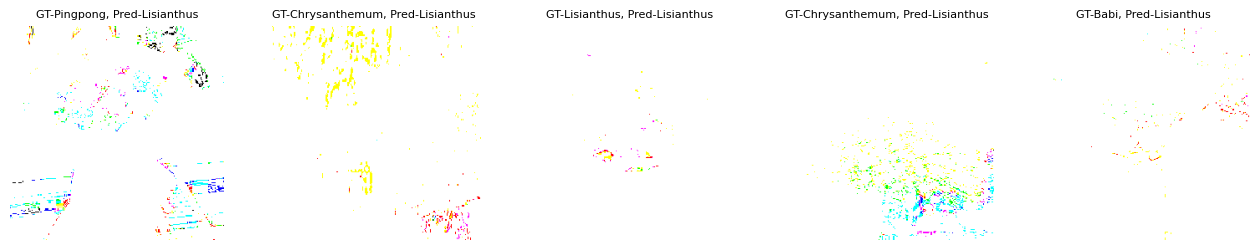

In [10]:
visualize_predictions(model, test_generator, to_file='images/baseline-model-sample-predictions.png')